<a href="http://esprit.tn"><img src = "https://upload.wikimedia.org/wikipedia/commons/f/ff/Logo_ESPRIT_Ariana.jpg" width = 300, align = "center"></a>



<h1 align=center><font size = 5>Lab 11: Unsupervised learning - K-means   </font></h1>

Estimated duration: 40 min

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered the one of the simplest model among them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you learn how to use k-Means for customer segmentation.


### Import libraries
Lets first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
import sklearn as sk
%matplotlib inline

# k-Means on a randomly generated dataset
Lets create our own dataset for this lab!


First we need to set up a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>

In [2]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br>
<b> <u> Input </u> </b>
<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [3]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

Display the scatter plot of the randomly generated data.

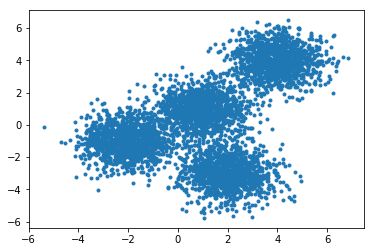

In [4]:
plt.scatter(X[:, 0], X[:, 1], marker='.')

## Setting up K-Means
Now that we have our random data, let's set up our K-Means Clustering.

The KMeans class has many parameters that can be used, but we will be using these three:
<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n\_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n\_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n\_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.

In [5]:
k_means = KMeans(init = "k-means++", n_clusters =4, n_init = 12, verbose=True)

Now let's fit the KMeans model with the feature matrix we created above, <b> X </b>

In [6]:
k_means.fit(X)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 9372.1272647783
start iteration
done sorting
end inner loop
Iteration 1, inertia 7874.683436657954
start iteration
done sorting
end inner loop
Iteration 2, inertia 7695.533523739901
start iteration
done sorting
end inner loop
Iteration 3, inertia 7681.353551902812
start iteration
done sorting
end inner loop
Iteration 4, inertia 7679.417318183369
start iteration
done sorting
end inner loop
Iteration 5, inertia 7679.185201655546
center shift 1.233946e-02 within tolerance 6.484166e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 14108.075109029362
start iteration
done sorting
end inner loop
Iteration 1, inertia 8341.907886862562
start iteration
done sorting
end inner loop
Iteration 2, inertia 7697.605896198573
start iteration
done sorting
end inner loop
Iteration 3, inertia 7679.298753644167
start iteration
done sorting
end inner loop
Iteration 4, inertia 76

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=True)

Now let's grab the labels for each point in the model using KMeans' <b> .labels\_ </b> attribute and save it as <b> k_means_labels </b> 

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster&#95;centers&#95; </b> and save it as <b> k_means_cluster_centers </b>

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

## Creating the Visual Plot
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

Note:  read through the code and comments to understand how to plot the model.

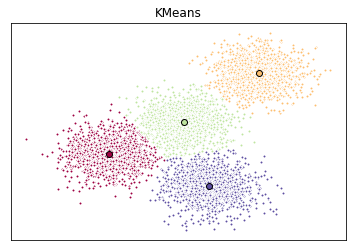

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


## Exercice:

-1- Using the same dataset, retrain the Kmeans model with 2 clusters. 
check clusters distributions 

-2- Retrain the Kmeans model with 5 clusters. 
check clusters distributions 

-3- Explain the impact of the selection on an inadequate clusters number?